## Michał Wiśniewski 418486

**Problem 4d (Monte Carlo counting ctd).** In this problem we use a different distribution on assignments, to overcome the difficulties arising in **4c**. 
 * How many assignments satisfy clause $C_i$?
 * How can we estimate the probability that a random assignment which satisfies $C_i$ does not satisfy any earlier clauses (i.e., $C_j$ for $j < i$)?
 * How can we estimate the number of assignments which satisfy $C_i$ but do not satisfy any earlier clauses?
 * How can we use the result of the previous question to construct an algorithm estimating the number of satisfying assignments?


 * How many assignments satisfy clause $C_i$?

Załóżmy, że *k* to długość $C_i$ a *M* to liczba wszystkich zmiennych. Wtedy są $2^{M-k}$ wartościowania, które spełniają klauzulę $C_i$.

* How can we estimate the probability that a random assignment which satisfies $C_i$ does not satisfy any earlier clauses (i.e., $C_j$ for $j < i$)?

Możemy ustalić jakąś liczbę $N$ i następnie wylosować $N$ wartościowań, w których ustawimy klauzulę $C_i$ na prawdziwą. Następnie zliczymy ilość takich wartościowań, w których żadna poprzednia nie jest spełniona, niech taka ilość to będzie $c$. Wtedy oszacowane prawdopodobieństwo tego, że wartościowanie spełnia klauzulę $C_i$, ale nie spełnia żadnej wcześniejszej jest równe $\frac{c}{N}$


* How can we estimate the number of assignments which satisfy $C_i$ but do not satisfy any earlier clauses?


Mając już oszacowane prawdopodobieństwo policzone wyżej i ilość wartościowań, które spełniają $C_i$ możemy oszacować, że ilość takich wartościowań, które spełniają $C_i$, ale nie spełniają żadnej poprzedniej klauzuli to: $\frac{c}{N} \cdot 2^{M-k}$

 * How can we use the result of the previous question to construct an algorithm estimating the number of satisfying assignments?

Możemy dla każdej klauzuli po kolei założyć, że jest prawdziwa i z tym warunkiem wylosować $N$ wartościowań i zliczać je tak jak opisałem w poprzednim podpunkcie: Czyli dla każdej klauzuli $C_i$ najpierw ustawiamy ją jako prawdziwą, potem losujemy wartościowanie reszty zmiennych i zliczamy ilość wartościowań, które nie spełniają żadnej poprzedniej klauzuli. Robimy tak $N$ razy. W taki sposób dla każdej klauzuli będziemy mieli oszacowaną ilość wartościowań, które spełnia tę klauzulę, ale nie spełnia żadnej poprzedniej i będzie można to zsumować aby otrzymać oszacowaną ilość wartościowań, które spełniają DNF.

In [31]:
import numpy as np
import matplotlib.pyplot as plt
import random
%matplotlib inline

In [32]:
#M = 4 # number of variables
#phi = [ [1,-3,4], [-1,2] ]

M = 64
phi = [[55, 3, -50, -57, 2, 51, -5, -56, -45, 1], [28, -1, -26, 35, 42, -43, 45, -56, -11, 6], [-18, 43, 1, 64, -34, 28, 48, -13, 29, 49], [-21, 12, 7, -49, -25, -45, 8, -51, 5, -26], [6, -26, 27, 51, 2, 9, 49, 29, -42, -35], [-12, 4, -32, -60, 2, 56, 31, 58, -19, -46], [-10, -52, 25, -8, -56, -24, -51, 20, 36, 22], [-64, -26, -36, -14, 3, 42, -20, -59, 25, 33], [-31, -33, 40, -29, -12, -49, 28, 11, 7, 22], [-25, 23, -17, -61, 34, 32, 24, -52, -21, -26], [-48, -42, -43, -24, 14, 50, -64, 60, 7, -53], [-1, 2, -61, -24, -53, 34, -13, 36, -46, 3], [3, -52, 60, 39, 9, 59, 57, 32, 6, -7], [-17, -28, -58, 33, 16, -22, -13, 26, 18, -11], [47, -39, 46, 40, -18, 24, 6, -23, -64, -22], [-6, 60, 35, 1, 52, 18, -33, 43, 45, -11], [57, -34, -32, 16, -41, -25, 37, 40, 43, -5], [58, -51, -40, 42, 5, 27, -41, 20, 32, 30], [-48, -11, -15, -14, -27, 17, -33, 55, -64, -51], [-11, -8, 48, 57, 42, 64, 40, -45, 13, -25], [-40, -39, 46, -36, -51, -58, 14, 7, -18, -6], [31, 38, -11, -45, -14, -9, -63, 27, -35, -46], [40, 11, 28, -26, -25, -20, -41, 16, 61, -32], [-35, 6, -58, 30, 62, -36, -7, -37, 38, 51], [-13, 58, 1, 14, 52, 8, 45, -49, -21, 51], [10, -62, -39, -57, 15, -40, 56, -31, -47, 23], [37, 22, -21, 52, -5, -19, -7, 50, 34, 9], [18, 14, -31, 27, -2, 5, 3, 48, 63, -34], [-43, 39, -29, 34, 60, -10, -61, -49, -42, 57], [-32, -29, -16, 53, -38, 52, -36, -62, -5, 45], [-28, 25, -31, -41, -44, -37, 20, 48, 59, 24], [49, -59, -13, -56, -29, -2, -45, -62, -38, -26], [-33, -31, 53, 64, 15, 17, 12, 50, 46, -54], [56, 57, 22, 4, 46, 21, 49, 14, 43, -41], [-8, 18, -21, -15, -42, -64, 45, 14, 13, -33], [-32, 62, 2, 10, -49, -64, 15, -35, -20, -17], [54, -64, -20, 37, -5, -26, -41, -35, 32, -25], [60, 58, -23, -43, -2, 15, 10, 9, 59, -45], [9, 29, -17, 45, -53, 18, 19, 50, 42, -61], [54, -51, 9, -52, -40, -37, -18, -59, 48, 3], [-32, -17, 38, 12, -27, 45, 57, -51, 56, 4], [-12, 62, -17, -50, -32, -45, -56, 46, 19, -61], [51, -27, 56, 45, 59, -25, 3, -18, 60, -44], [-50, 5, -10, 12, -23, -41, 31, -59, -35, 30], [-5, 18, -4, -63, 22, -40, 10, -62, 61, -35], [1, -10, 31, -41, 56, -17, -61, 22, 46, -14], [-45, 32, 54, -48, -25, 10, 31, -63, 38, -17], [50, -46, 44, -57, -45, -1, -63, 15, 4, 12], [-39, -28, 49, -9, 53, 25, 47, -6, 24, -36], [-41, 59, 13, 15, 21, -20, -19, 2, -22, 37], [-31, 23, -57, -38, 30, 59, 28, 6, 53, 26], [-38, -62, 14, 26, 12, 46, 10, 35, -18, -43], [20, -10, -48, -62, -17, -27, 49, -11, 59, 7], [-43, -46, -14, -31, -62, 52, -10, 40, -63, 32], [15, -12, 43, -19, -34, -25, -14, 62, 50, 61], [24, -52, 32, 61, 18, -44, 49, 29, 55, -57], [-27, 25, 55, -57, 12, 9, -43, 29, 36, 18], [13, -27, 21, -24, -8, 39, -60, 34, -11, 54], [-51, -3, 12, 26, -9, -23, -18, 28, 24, 11], [-1, -10, 9, 35, -55, -30, 48, 53, -32, -24], [-59, -58, -30, -46, 17, 11, 3, -18, -1, -50], [-61, -52, 17, -4, -44, -56, 64, 37, -47, 46], [28, 59, -23, 29, -5, -41, 39, 57, 2, 34], [-54, 56, 5, -20, -6, 13, 49, 28, -42, 25]]


In [33]:
%%time

def estimate_dnf(N):
    result = 0 # Wynik - oszacowana ilość wszystkich wartościowań, które spełniają dnf.
    for idx, clause in enumerate(phi): # dla kazdej klauzuli w phi
        count = 0 # Licznik interesujących nas wartościowań.
        for i in range(N): # Losujemy wszystkie zmienne N razy
            smpl = 2 * np.random.randint(2, size=M) - 1 # tworzymy wartościowanie
            for numb in clause: # Ustawiamy klauzulę na prawdziwą
                if numb > 0:
                    smpl[numb-1] = 1
                else:
                    smpl[abs(numb)-1] = -1
            to_add = True
            for ch in range(idx): # sprawdzamy czy dane wartościowanie spełnia poprzednie klauzule
                mul = smpl[np.abs(phi[ch])-1] * phi[ch]
                if (mul > 0).all():
                    to_add = False
                    break
            if to_add:
                count += 1
                
        # Dodajemy do wyniku według wzoru.
        result += (count / N) * (2**(M-len(clause))) 
        
    return result

N = 100
c = estimate_dnf(N)
print(c)


1.1174331395431674e+18
CPU times: user 1.7 s, sys: 20.3 ms, total: 1.72 s
Wall time: 1.69 s


In [34]:
sample_dnf = [estimate_dnf(N) for _ in range(20)]

(array([2., 0., 2., 2., 5., 1., 5., 1., 1., 1.]),
 array([1.11473098e+18, 1.11559567e+18, 1.11646036e+18, 1.11732505e+18,
        1.11818974e+18, 1.11905444e+18, 1.11991913e+18, 1.12078382e+18,
        1.12164851e+18, 1.12251320e+18, 1.12337789e+18]),
 <BarContainer object of 10 artists>)

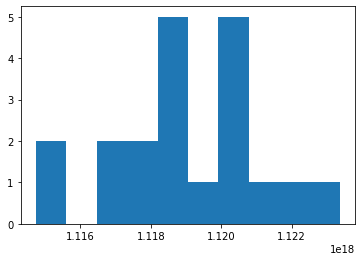

In [35]:
plt.hist(sample_dnf)